In [10]:
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [11]:
im1 = io.imread('BGGR.png')
im2 = io.imread('GBRG.png')
im3 = io.imread('GRBG.png')
im4 = io.imread('RGGB.png')
im5 = io.imread('RGGB2.png')

im1O = io.imread('compare/1.png')
im2O = io.imread('compare/2.png')
im3O = io.imread('compare/3.png')
im4O = io.imread('compare/4.png')
im5O = io.imread('compare/5.png')

In [12]:
def drawImage(image, title, h):
    axes[h].set_title(title)
    axes[h].imshow(image, cmap='gray')

In [13]:
def toRGGB(arr):
    return [arr[0], (int(arr[1]) + int(arr[2]))//2, arr[3]]

def toBGGR(arr):
    return [arr[3], (int(arr[1]) + int(arr[2]))//2, arr[0]]

def toGBRG(arr):
    return [arr[2], (int(arr[0]) + int(arr[3]))//2, arr[1]]

def toGRBG(arr):
    return [arr[1], (int(arr[0]) + int(arr[3]))//2, arr[2]]

In [14]:
def superPixel(img, mode):
    out = np.ones((len(img) // 2, len(img[0]) // 2, 3))
    m = 0
    n = 0
    for i in range(0, len(img), 2):
        n = 0
        for j in range(0, len(img[i]), 2):
            if i + 2 >= len(img) or j + 2 >= len(img[i]): break
            else:
                if mode == "RGGB":
                    out[m][n] = toRGGB(img[i:i+2, j:j+2].reshape(-1, 4)[0])
                elif mode == "BGGR":
                    out[m][n] = toBGGR(img[i:i+2, j:j+2].reshape(-1, 4)[0])
                elif mode == "GBRG":
                    out[m][n] = toGBRG(img[i:i+2, j:j+2].reshape(-1, 4)[0])
                elif mode == "GRBG":
                    out[m][n] = toGRBG(img[i:i+2, j:j+2].reshape(-1, 4)[0])
                else:
                    print("Указан неверный режим работы.")
                    return 0
            n += 1
        m += 1

    return np.int16(out)

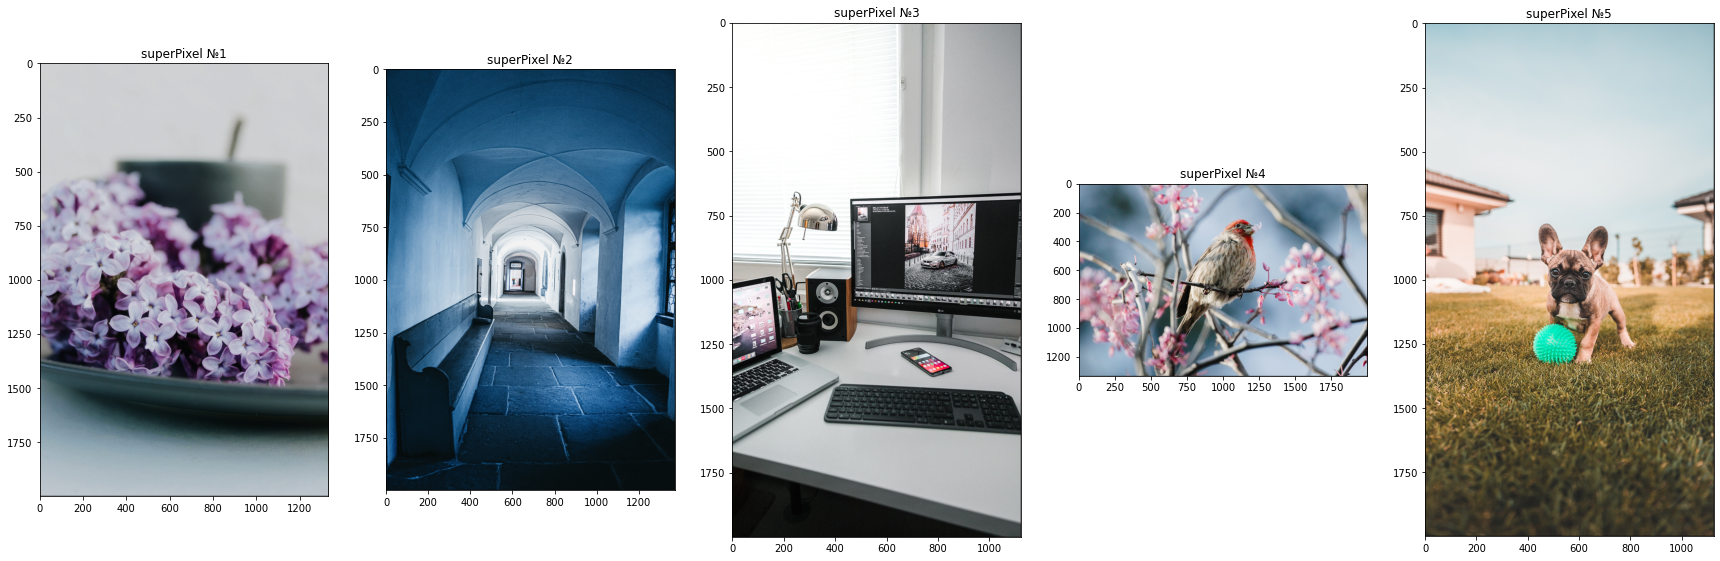

In [15]:
im1Pix = superPixel(im1, "BGGR")
im2Pix = superPixel(im2, "GBRG")
im3Pix = superPixel(im3, "GRBG")
im4Pix = superPixel(im4, "RGGB")
im5Pix = superPixel(im5, "RGGB")

fig, axes = plt.subplots(1,5)
fig.set_figwidth(30)
fig.set_figheight(20)

drawImage(im1Pix, 'superPixel №1',0)
drawImage(im2Pix, 'superPixel №2',1)
drawImage(im3Pix, 'superPixel №3',2)
drawImage(im4Pix, 'superPixel №4',3)
drawImage(im5Pix, 'superPixel №5',4)

In [16]:
def imPad(image):
    extra_col_left = [el[1] for el in [i for i in image]]
    image = np.c_[extra_col_left, image]
    image = np.r_[image[1].reshape(1, -1), image]

    extra_col_right = [el[-2] for el in [i for i in image]]
    image = np.c_[image, extra_col_right]
    image = np.r_[image, image[-2].reshape(1, -1)]

    image[0][0] = image[2][2]
    image[0][-1] = image[2][-3]
    image[-1][-1] = image[-3][-3]
    image[-1][0] = image[-3][2]

    return image


def R_(gray_image, index_1, index_2):
    target_y = index_1
    target_x = index_2
    delit = 4

    #R
    R = gray_image[target_y][target_x]

    #G
    G = 0
    G += gray_image[target_y][target_x - 1]
    G += gray_image[target_y - 1][target_x]
    G += gray_image[target_y][target_x + 1]
    G += gray_image[target_y + 1][target_x]
    G = int(G / delit)

    #B
    B = 0
    B += gray_image[target_y - 1][target_x - 1]
    B += gray_image[target_y - 1][target_x + 1]
    B += gray_image[target_y + 1][target_x + 1]
    B += gray_image[target_y + 1][target_x - 1]
    B = int(B / delit)

    return R, G, B


def G_first(gray_image, index_1, index_2):
    target_y = index_1
    target_x = index_2
    delit = 2

    #G
    G = gray_image[target_y][target_x]

    #R
    R = 0
    R += gray_image[target_y][target_x - 1]
    R += gray_image[target_y][target_x + 1]
    R = int(R / delit)

    #B
    B = 0
    B += gray_image[target_y - 1][target_x]
    B += gray_image[target_y + 1][target_x]
    B = int(B / delit)
    return R, G, B


def G_second(gray_image, index_1, index_2):
    target_y = index_1
    target_x = index_2
    delit = 2

    #G
    G = gray_image[target_y][target_x]

    #R
    R = 0
    R += gray_image[target_y - 1][target_x]
    R += gray_image[target_y + 1][target_x]
    R = int(R / delit)

    #B
    B = 0
    B += gray_image[target_y][target_x - 1]
    B += gray_image[target_y][target_x + 1]
    B = int(B / delit)
    return R, G, B

def B_(gray_image, index_1, index_2):
    target_y = index_1
    target_x = index_2
    delit = 4

    #B
    B = gray_image[target_y][target_x]

    #G
    G = 0
    G += gray_image[target_y][target_x - 1]
    G += gray_image[target_y - 1][target_x]
    G += gray_image[target_y][target_x + 1]
    G += gray_image[target_y + 1][target_x]
    G = int(G / delit)

    #R
    R = 0
    R += gray_image[target_y - 1][target_x - 1]
    R += gray_image[target_y - 1][target_x + 1]
    R += gray_image[target_y + 1][target_x + 1]
    R += gray_image[target_y + 1][target_x - 1]
    R = int(R / delit)

    return R, G, B

In [17]:
def bilinear_interpolation(image):
    color_image = []

    for rows_ind in range(len(image[1:-1])):
        if rows_ind % 2 == 0:
            first_row = []

            for cols_ind in range(len(image[rows_ind + 1][1:-1])):
                RGB = { 'r': 0, 'g': 0, 'b': 0 }
                if cols_ind % 2 == 0:
                    RGB['r'], RGB['g'], RGB['b'] = R_(image, rows_ind + 1, cols_ind + 1)
                    first_row.append(list(RGB.values()))
                    continue
                RGB['r'], RGB['g'], RGB['b'] = G_first(image, rows_ind + 1, cols_ind + 1)
                first_row.append(list(RGB.values()))
            color_image.append(first_row)
            continue

        second_row = []

        for cols_ind in range(len(image[rows_ind + 1][1:-1])):
            RGB = { 'r': 0, 'g': 0, 'b': 0 }
            if cols_ind % 2 == 0:
                RGB['r'], RGB['g'], RGB['b'] = G_second(image, rows_ind + 1, cols_ind + 1)
                second_row.append(list(RGB.values()))
                continue
            RGB['r'], RGB['g'], RGB['b'] = B_(image, rows_ind + 1, cols_ind + 1)
            second_row.append(list(RGB.values()))
        color_image.append(second_row)

    return np.array(color_image)

In [ ]:
im1BI = bilinear_interpolation(imPad(im1))
im2BI = bilinear_interpolation(imPad(im2))
im3BI = bilinear_interpolation(imPad(im3))
im4BI = bilinear_interpolation(imPad(im4))
im5BI = bilinear_interpolation(imPad(im5))


fig, axes = plt.subplots(1,5)
fig.set_figwidth(30)
fig.set_figheight(20)

drawImage(im1BI, 'Изображение №1',0)
drawImage(im2BI, 'Изображение №2',1)
drawImage(im3BI, 'Изображение №3',2)
drawImage(im4BI, 'Изображение №4',3)
drawImage(im5BI, 'Изображение №5',4)